#  PROBLEM STATEMENT


## 1.Business Understanding

The used car dataset is obtained from [Truecar](https://www.truecar.com/used-cars-for-sale/) which is a leading automotive digital marketplace that seeks to make car buying and selling easy, transparent and efficient.

From discovery to delivery, consumers can use TrueCar to explore new and used vehicles from an expansive, cross-brand selection of inventory from our vast network of Certified Dealers.

Founded in 2005, TrueCar has built a trusted brand and a strong reputation for providing consumers with useful tools, research, market context and pricing transparency as they embark on their car-buying journey. The Company is bringing more of the purchasing process online by allowing consumers to find a new or used vehicle that is right for them, secure financing, sell or trade-in their current vehicle and complete their purchase with a reputable dealer all from the comfort of their home.

### Objective

To create a model that predicts prices of used cars in New York and Carlifonia

### Import libraries


In [462]:
import pandas as pd # for data manipulation,data processing, CSV file I/O (e.g. pd.read_csv)
import pandas.io.sql as sqlio # allows manipulation of a Pandas Dataframe using SQL
import psycopg2 as ps # used to perform operations on PostgreSQL using python
import numpy as np # for numerical calculation
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for interactive plotting with colors /used for plot interactive graph. I like it most for plot
from sklearn.preprocessing import LabelEncoder # Encode target labels with value between 0 and n_classes-1
from scipy import stats # offers variety of statistic functions
from sklearn.preprocessing import StandardScaler # removes the mean and scales each feature/variable to unit variance.
from sklearn.model_selection import train_test_split # to split arrays or matrices into random train and test subsets
from sklearn.linear_model import LinearRegression # For building machine learning model
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense,Activation
from sklearn import metrics # for evaluating our model
import pickle # Pickle is used for serializing and de-serializing a Python object structure
%matplotlib inline

### Load Dataset

In [463]:
#Establishing a connection between jupyter otebook and postgresql database 

conn2 = ps.connect(dbname='postgres',
                   user='postgres',
                   password='0112358',
                   host='localhost',
                   port='5432' )

In [464]:
#loading our dataset

sql = """select * from used_car_data"""
df = sqlio.read_sql_query(sql,conn2)

C:\Users\user\AppData\Local\Temp\ipykernel_4880\1332430663.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = sqlio.read_sql_query(sql,conn2)


## 2.Data Understanding

In [465]:
#previewing the first 5 rows of the data
df.head()

,index,brand,model,mileage,year,fuel_type,ownerCount,accidentCount,transmission,city,state,body_style,engine,drive_train,price
0,0,Mercedes-Benz,GLC,18386,2019,Gas,1.0,0,Automatic,New York,NY,SUV,2.0L Inline-4 Gas Turbocharged,AWD,37906
1,1,Mercedes-Benz,C-Class,41829,2018,Gas,1.0,0,Automatic,New York,NY,Sedan,2.0L Inline-4 Gas Turbocharged,AWD,31901
2,2,Mercedes-Benz,C-Class,22667,2018,Gas,1.0,0,Automatic,New York,NY,Sedan,2.0L Inline-4 Gas Turbocharged,AWD,33906
3,3,Ferrari,612 Scaglietti,15104,2005,Gas,2.0,0,Automatic,New York,NY,Coupe,5.8L V-12 Gas,RWD,110500
4,4,Mercedes-Benz,GLA,33163,2019,Gas,1.0,0,Automatic,New York,NY,SUV,2.0L Inline-4 Gas Turbocharged,AWD,32904


In [466]:
#previewing 10 rows
df.sample(10)

,index,brand,model,mileage,year,fuel_type,ownerCount,accidentCount,transmission,city,state,body_style,engine,drive_train,price
4882,4884,Toyota,Highlander,25455,2019,Gas,1.0,1,Automatic,Brooklyn,NY,SUV,3.5L V-6 Gas,AWD,36731
7190,7199,Honda,Odyssey,13125,2019,Gas,1.0,0,Automatic,Daly City,CA,Minivan,3.5L V-6 Gas,FWD,42988
8980,8990,Mazda,CX-5,29779,2019,Gas,1.0,2,Automatic,Daly City,CA,SUV,2.5L Inline-4 Gas,FWD,24998
3656,3657,Jeep,Cherokee,27180,2019,Gas,2.0,0,Automatic,Bensalem,PA,SUV,3.2L V-6 Gas,4WD,29997
4308,4309,BMW,X3,105755,2011,Gas,3.0,0,Automatic,Garfield,NJ,SUV,3.0L Inline-6 Gas,AWD,11399
2976,2977,Honda,Accord,15571,2018,Gas,3.0,2,Automatic,Newark,NJ,Sedan,1.5L Inline-4 Gas Turbocharged,FWD,25995
139,139,Chevrolet,Silverado 1500,182555,2006,Gas,1.0,0,Automatic,Brooklyn,NY,Pickup Truck,5.3L V-8 Gas,4WD,4999
5516,5518,Dodge,Charger,39333,2018,Gas,1.0,0,Automatic,Daly City,CA,Sedan,3.6L V-6 Gas,RWD,28998
1010,1010,Volvo,XC90,53832,2019,Gas,1.0,1,Automatic,Secaucus,NJ,SUV,2.0L Inline-4 Gas Supercharged and Turbocharged,AWD,47886
3299,3300,Jeep,Grand Cherokee,32195,2018,Gas,1.0,0,Automatic,Eatontown,NJ,SUV,3.6L V-6 Gas,4WD,31999


In [467]:
#previewing the columns
df.columns

Index(['index', 'brand', 'model', 'mileage', 'year', 'fuel_type', 'ownerCount',
       'accidentCount', 'transmission', 'city', 'state', 'body_style',
       'engine', 'drive_train', 'price'],
      dtype='object')

In [468]:
#previewing the dimensions or shape (rows and columns)of the data

df.shape

(10128, 15)

#### There are 10,128 rows and 15 columns

In [469]:
#previewing the information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10128 entries, 0 to 10127
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          10128 non-null  int64  
 1   brand          10128 non-null  object 
 2   model          10128 non-null  object 
 3   mileage        10128 non-null  int64  
 4   year           10128 non-null  int64  
 5   fuel_type      10128 non-null  object 
 6   ownerCount     10128 non-null  float64
 7   accidentCount  10128 non-null  int64  
 8   transmission   10128 non-null  object 
 9   city           10128 non-null  object 
 10  state          10128 non-null  object 
 11  body_style     10128 non-null  object 
 12  engine         10128 non-null  object 
 13  drive_train    10128 non-null  object 
 14  price          10128 non-null  int64  
dtypes: float64(1), int64(5), object(9)
memory usage: 1.2+ MB


In [470]:
#previewing the summary numerical statistics of our data

df.describe()

,index,mileage,year,ownerCount,accidentCount,price
count,10128.000000,10128.000000,10128.000000,10128.000000,10128.000000,10128.000000
mean,5067.788606,47844.902449,2017.591035,1.484301,0.165482,31203.593503
std,2927.858320,35535.861685,2.790433,0.784685,0.444917,20124.758054
min,0.000000,17.000000,1998.000000,0.000000,0.000000,1899.000000
25%,2532.750000,23465.750000,2017.000000,1.000000,0.000000,21988.000000
50%,5065.500000,38739.500000,2018.000000,1.000000,0.000000,27998.000000
75%,7604.250000,61533.000000,2019.000000,2.000000,0.000000,36722.750000
max,10138.000000,376352.000000,2022.000000,9.000000,5.000000,442500.000000


In [471]:
#previewing both numerical and categorical statistics

df.describe(include="all")

,index,brand,model,mileage,year,fuel_type,ownerCount,accidentCount,transmission,city,state,body_style,engine,drive_train,price
count,10128.000000,10128,10128,10128.000000,10128.000000,10128,10128.000000,10128.000000,10128,10128,10128,10128,10128,10128,10128.000000
unique,NaN,48,444,NaN,NaN,7,NaN,NaN,2,187,5,11,164,4,NaN
top,NaN,Ford,Accord,NaN,NaN,Gas,NaN,NaN,Automatic,Daly City,CA,SUV,2.0L Inline-4 Gas Turbocharged,FWD,NaN
freq,NaN,1146,296,NaN,NaN,9590,NaN,NaN,9837,2804,5060,4871,1435,3524,NaN
mean,5067.788606,NaN,NaN,47844.902449,2017.591035,NaN,1.484301,0.165482,NaN,NaN,NaN,NaN,NaN,NaN,31203.593503
std,2927.858320,NaN,NaN,35535.861685,2.790433,NaN,0.784685,0.444917,NaN,NaN,NaN,NaN,NaN,NaN,20124.758054
min,0.000000,NaN,NaN,17.000000,1998.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,1899.000000
25%,2532.750000,NaN,NaN,23465.750000,2017.000000,NaN,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,21988.000000
50%,5065.500000,NaN,NaN,38739.500000,2018.000000,NaN,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,27998.000000
75%,7604.250000,NaN,NaN,61533.000000,2019.000000,NaN,2.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,36722.750000


In [472]:
#checking for missing values in our data

df.isna().sum()

index            0
brand            0
model            0
mileage          0
year             0
fuel_type        0
ownerCount       0
accidentCount    0
transmission     0
city             0
state            0
body_style       0
engine           0
drive_train      0
price            0
dtype: int64

In [473]:
#checking for duplicated values in our data

df.duplicated().sum()

0

In [474]:
#checking unique values

df.nunique()

index            10128
brand               48
model              444
mileage           9006
year                25
fuel_type            7
ownerCount           9
accidentCount        6
transmission         2
city               187
state                5
body_style          11
engine             164
drive_train          4
price             3441
dtype: int64

## 3.Exploratory Data Analysis --Data Wrangling\Cleaning

In [475]:
# we need to remove the index column

df.drop('index',axis=1,inplace=True)

#### Encoding categorical values to numerical values

In [476]:
#Instantiation

le=LabelEncoder()

In [477]:
df['brand'] = le.fit_transform(df['brand'])
df['model'] = le.fit_transform(df['model'])
df['transmission'] = le.fit_transform(df['transmission'])
df['drive_train']  = le.fit_transform(df['drive_train'])
df['fuel_type']    = le.fit_transform(df['fuel_type'])
df['body_style'] = le.fit_transform(df['body_style'])
df['engine'] = le.fit_transform(df['engine'])
df['state'] = le.fit_transform(df['state'])



In [478]:
df.columns

Index(['brand', 'model', 'mileage', 'year', 'fuel_type', 'ownerCount',
       'accidentCount', 'transmission', 'city', 'state', 'body_style',
       'engine', 'drive_train', 'price'],
      dtype='object')

## 4.Data Visualization


### I.Univariate analysis

####     Mileage

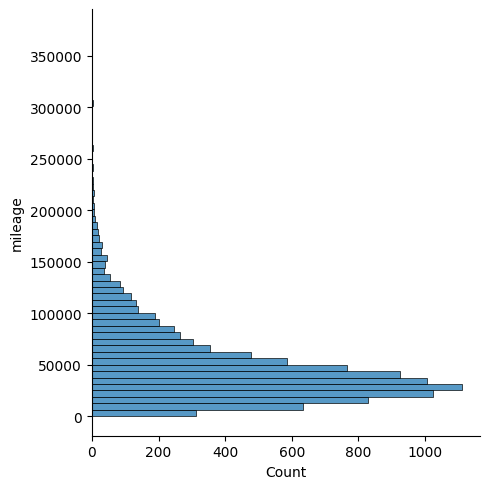

In [479]:
sns.displot(y='mileage',data=df,bins=60)


#### Year

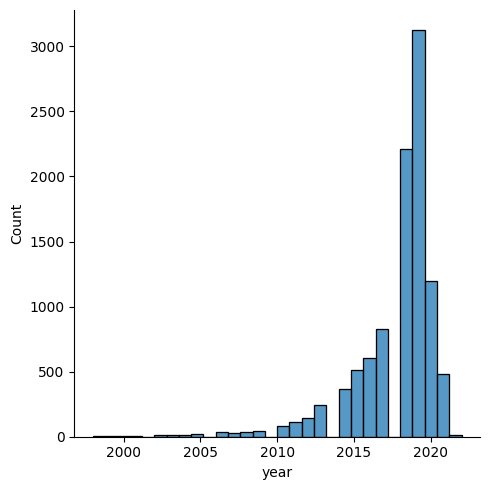

In [480]:
sns.displot(x='year',data=df,bins=30)

#### Fuel Type

<AxesSubplot: xlabel='count', ylabel='fuel_type'>

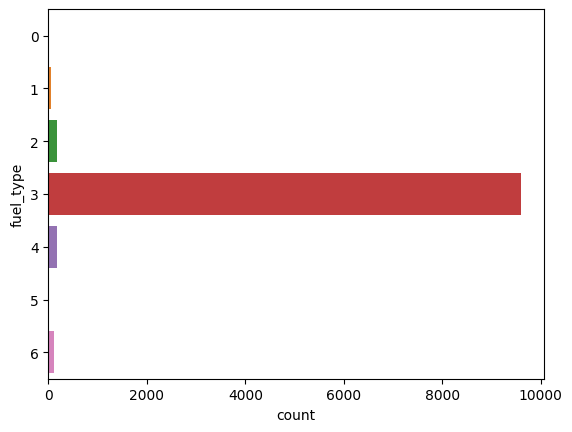

In [481]:
# 0 CNG
# 1 Diesel
# 2 Electric
# 3 Gas
# 4 Hybrid
# 5 Hydrogen
# 6 Plug-In Hybrid

sns.countplot(data=df,y='fuel_type')

#### Owner Count

<AxesSubplot: xlabel='ownerCount', ylabel='count'>

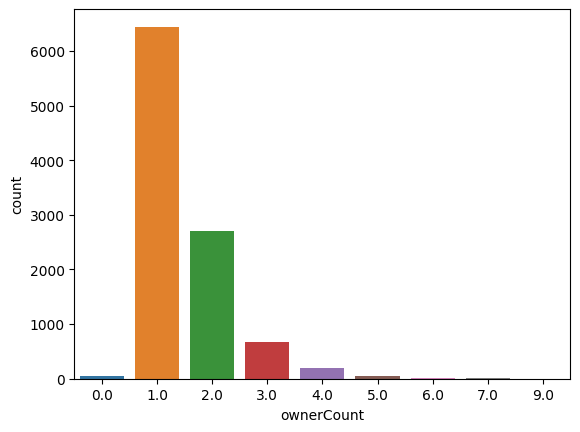

In [482]:
sns.countplot(data=df,x='ownerCount')

#### Accident Count

<AxesSubplot: xlabel='accidentCount', ylabel='count'>

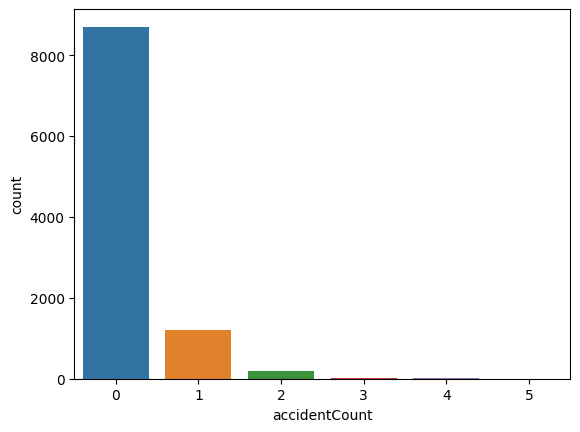

In [483]:
sns.countplot(data=df,x='accidentCount')

#### Transmission

<AxesSubplot: xlabel='transmission', ylabel='count'>

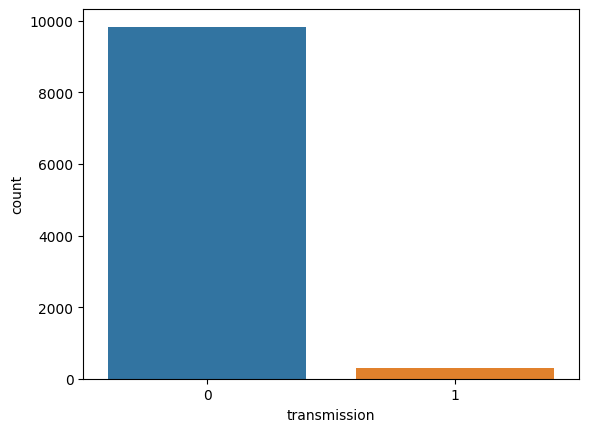

In [484]:
# 0 automatic
# 1 Manual

sns.countplot(data=df,x='transmission',)

#### State

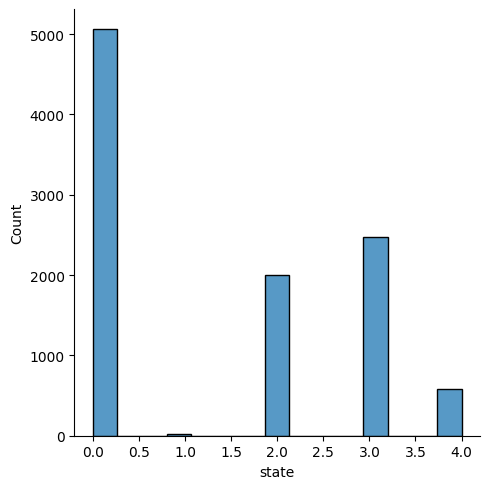

In [485]:
sns.displot(x='state',data=df)

#### Drive Train

<AxesSubplot: xlabel='drive_train', ylabel='Count'>

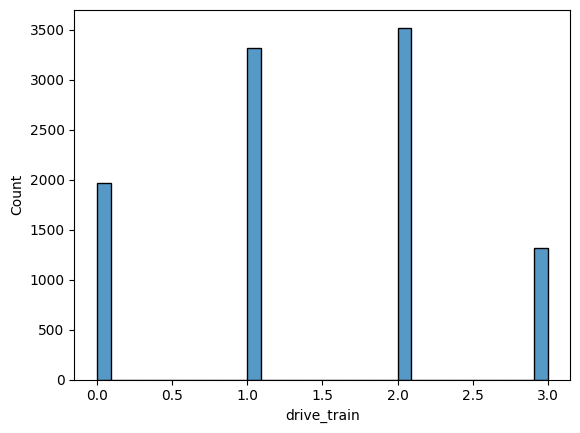

In [486]:
# 0 4WD
# 1 AWD
# 2 FWD
# 3 RWD


sns.histplot(x='drive_train',data=df)

#### Price

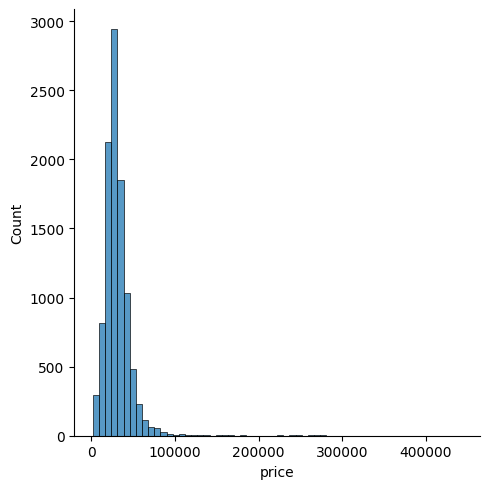

In [487]:
sns.displot(x='price',data=df,bins=60)

### II.Bivariate analysis

#### mileage vs price

<AxesSubplot: xlabel='mileage', ylabel='price'>

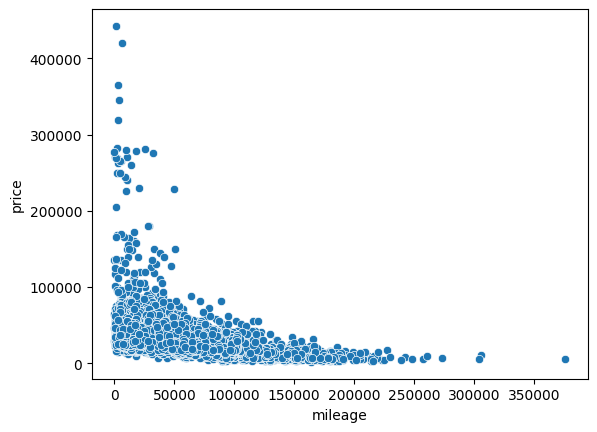

In [488]:
sns.scatterplot(data=df,x='mileage',y='price')

#### year vs price

<AxesSubplot: xlabel='year', ylabel='price'>

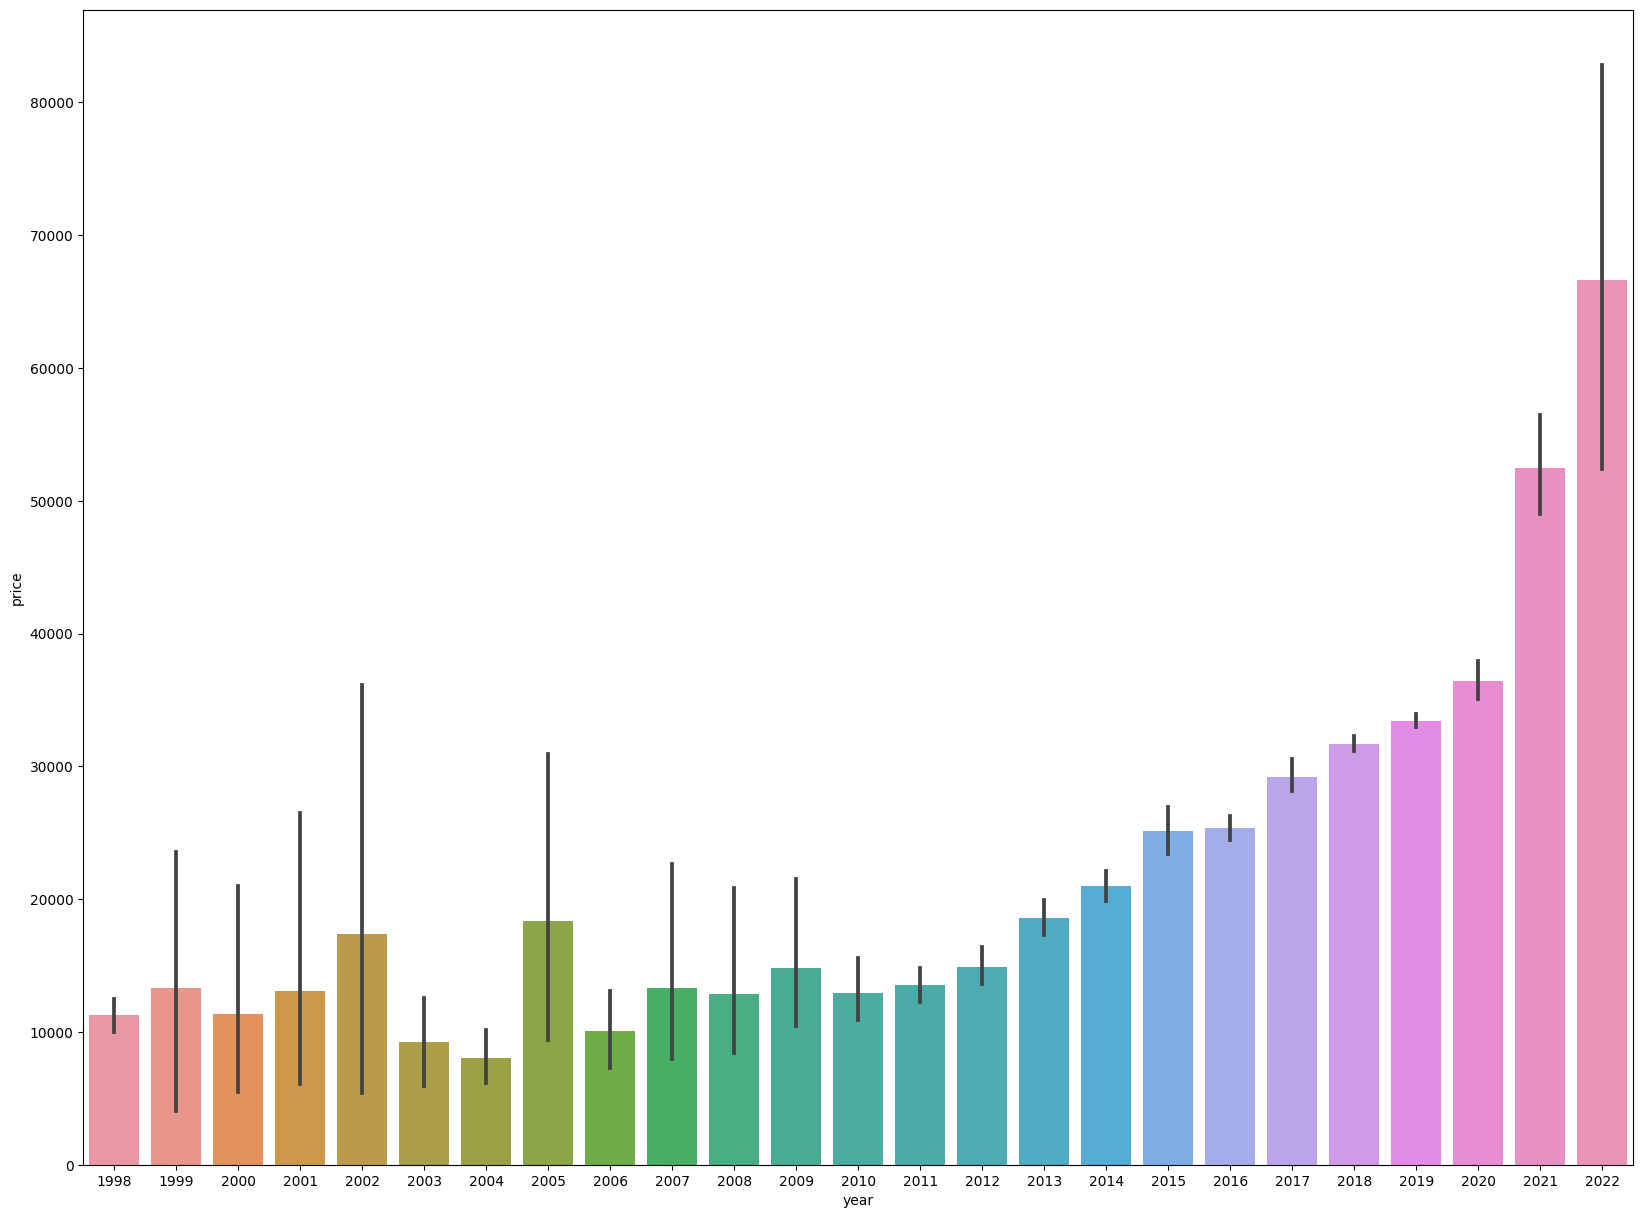

In [489]:
plt.figure(figsize=(20,15))
sns.barplot(data=df,x='year',y='price')

#### fuel_type vs price with trasmission as hue

<AxesSubplot: xlabel='fuel_type', ylabel='price'>

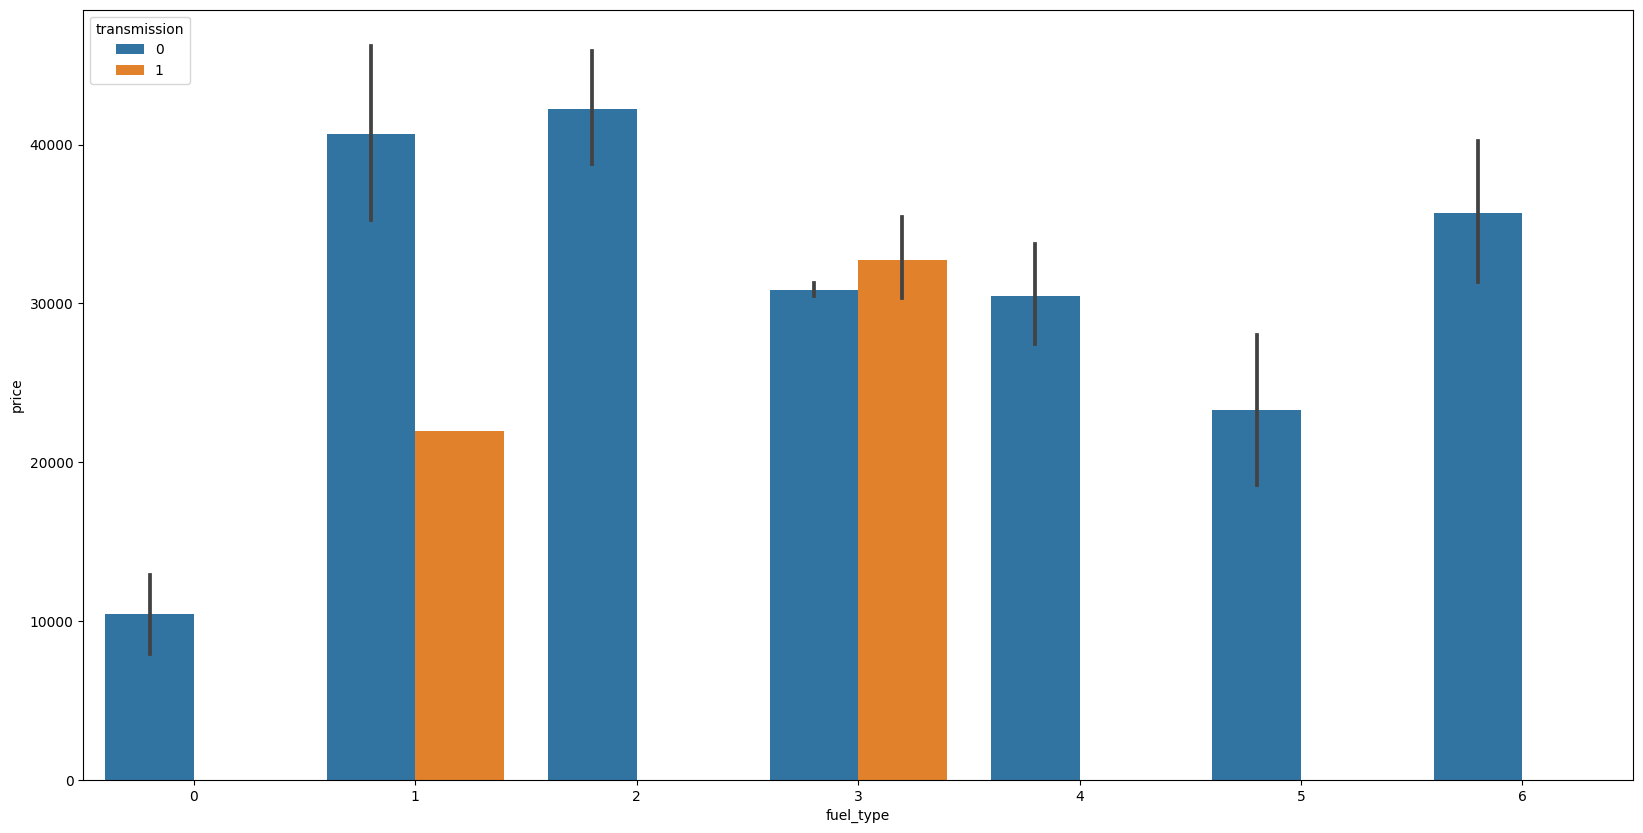

In [490]:
# 0 CNG
# 1 Diesel
# 2 Electric
# 3 Gas
# 4 Hybrid
# 5 Hydrogen
# 6 Plug-In Hybrid

plt.figure(figsize=(20,10))
sns.barplot(data=df,x='fuel_type',y='price',hue='transmission')


#### owner count vs price with accident count as hue

<AxesSubplot: xlabel='ownerCount', ylabel='price'>

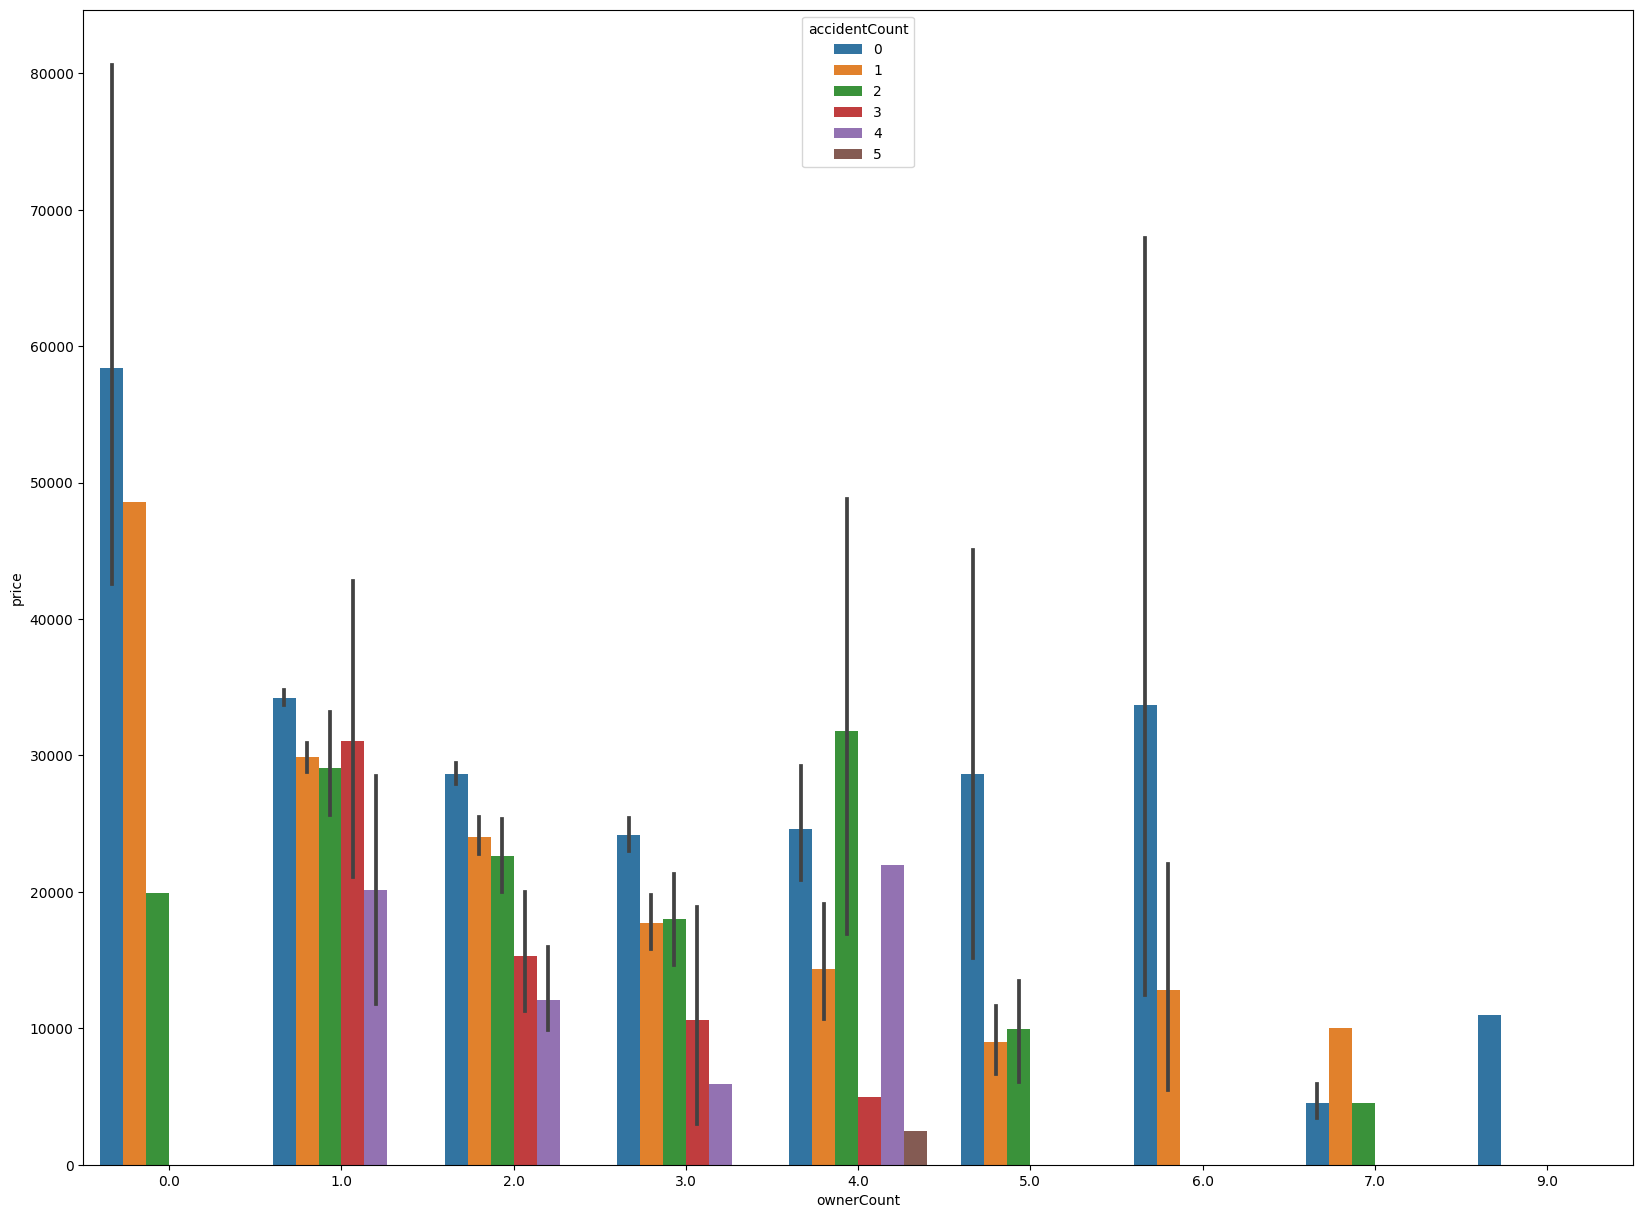

In [491]:
plt.figure(figsize=(20,15))
sns.barplot(data=df,x='ownerCount',y='price',hue='accidentCount')

####  state vs price

<AxesSubplot: xlabel='state', ylabel='price'>

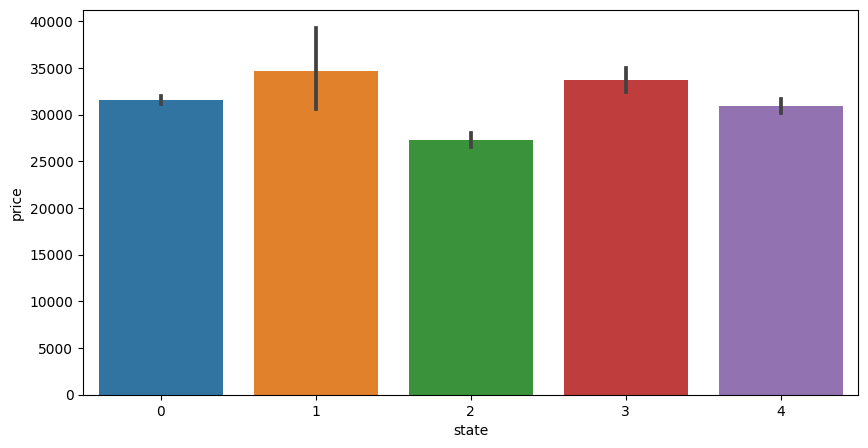

In [492]:
plt.figure(figsize=(10,5))
sns.barplot(data=df,x='state',y='price')

#### drive train vs price with transmission as hue

<AxesSubplot: xlabel='drive_train', ylabel='price'>

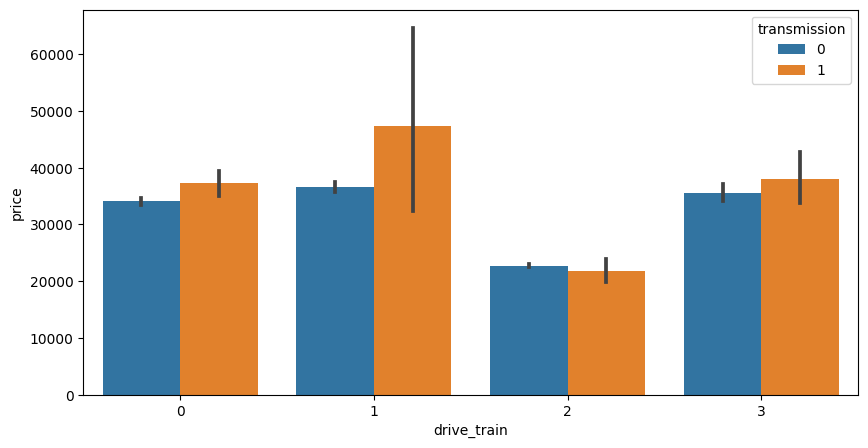

In [493]:
plt.figure(figsize=(10,5))
sns.barplot(x='drive_train',y='price',data=df,hue='transmission')

## 5.Data Preprocessing and Feature Engineering

### correlation

C:\Users\user\AppData\Local\Temp\ipykernel_4880\1950816695.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='coolwarm')


<AxesSubplot: >

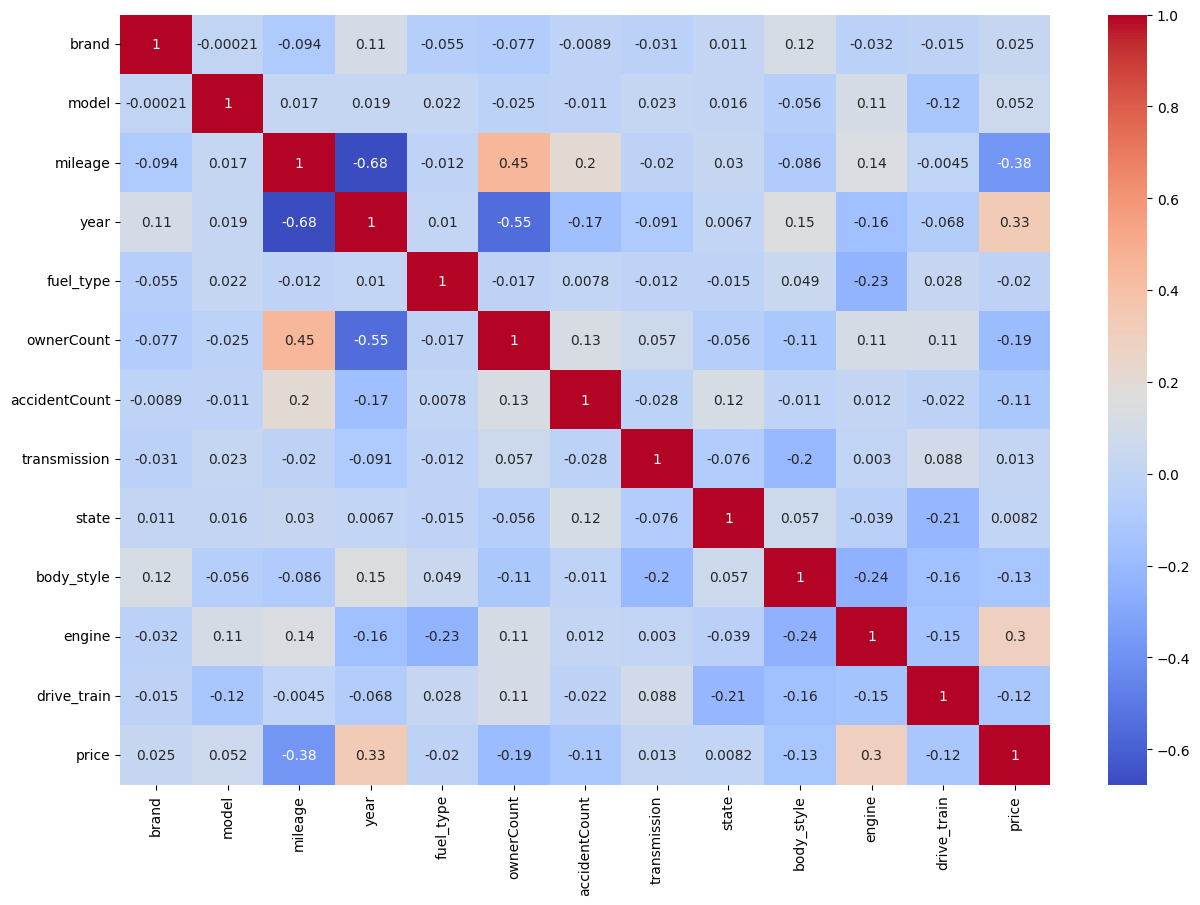

In [494]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

### Removing outliers

In [495]:
df.head()

,brand,model,mileage,year,fuel_type,ownerCount,accidentCount,transmission,city,state,body_style,engine,drive_train,price
0,32,167,18386,2019,3,1.0,0,0,New York,3,8,34,1,37906
1,32,63,41829,2018,3,1.0,0,0,New York,3,9,34,1,31901
2,32,63,22667,2018,3,1.0,0,0,New York,3,9,34,1,33906
3,12,22,15104,2005,3,2.0,0,0,New York,3,3,141,3,110500
4,32,165,33163,2019,3,1.0,0,0,New York,3,8,34,1,32904


In [496]:
#Removing categorical columns

df.drop(['city'],axis=1,inplace=True)

<AxesSubplot: xlabel='price'>

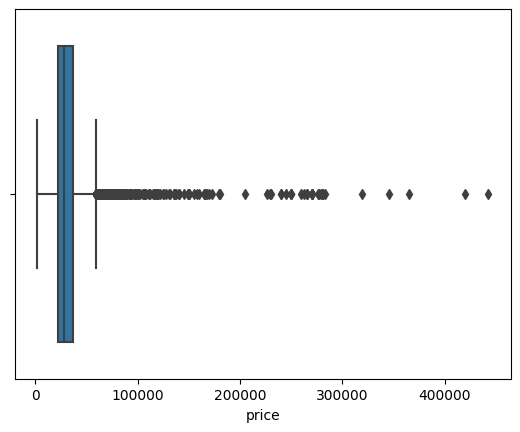

In [497]:
sns.boxplot(x='price',data = df)

In [498]:
#remove outliers in all the columns

df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
df.shape

(8825, 13)

<Figure size 1200x800 with 0 Axes>

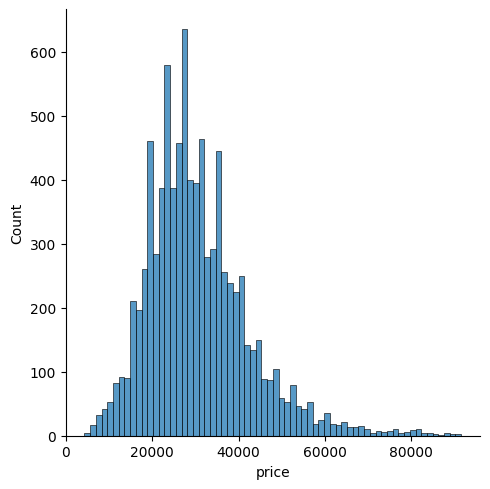

In [499]:
plt.figure(figsize=(12,8))
sns.displot(df['price'])

In [500]:
df.head()

,brand,model,mileage,year,fuel_type,ownerCount,accidentCount,transmission,state,body_style,engine,drive_train,price
0,32,167,18386,2019,3,1.0,0,0,3,8,34,1,37906
1,32,63,41829,2018,3,1.0,0,0,3,9,34,1,31901
2,32,63,22667,2018,3,1.0,0,0,3,9,34,1,33906
4,32,165,33163,2019,3,1.0,0,0,3,8,34,1,32904
5,32,168,18421,2018,3,1.0,1,0,3,8,88,1,43901


### scaling the data

In [501]:
trans = StandardScaler()

#### defining predictor variables and target variable

In [502]:
df.columns

Index(['brand', 'model', 'mileage', 'year', 'fuel_type', 'ownerCount',
       'accidentCount', 'transmission', 'state', 'body_style', 'engine',
       'drive_train', 'price'],
      dtype='object')

In [503]:
#Dependent variable is also referred as target variable and the independent variables are called the predictors.

X = df.drop(['price','brand','model'],axis=1)
y = df['price']

In [506]:
X.to_csv('x_cleaned')

In [507]:
#scaling predictor variable

X = trans.fit_transform(X.values)
X = pd.DataFrame(X)

#### splitting data into train and test set

In [509]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=42,shuffle=True)

### Linear Regression

#### instantiating our linear regression model and fitting our model to the data

In [510]:
lm = LinearRegression()

In [511]:
lm.fit(X_train,y_train)

LinearRegression()

### ANN

In [512]:
model = Sequential()

In [513]:
model.add(Dense(12,activation='relu'))
model.add(Dense(24,activation='relu'))
model.add(Dense(24,activation='relu'))
model.add(Dense(12,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')


In [514]:
model.fit(X_train,y_train.values,validation_data=(X_test,y_test.values),batch_size=128, epochs= 150 )

Epoch 1/150
49/49 [==============================] - 1s 5ms/step - loss: 1075175040.0000 - val_loss: 1088262144.0000
Epoch 2/150
49/49 [==============================] - 0s 3ms/step - loss: 1074518912.0000 - val_loss: 1086576000.0000
Epoch 3/150
49/49 [==============================] - 0s 3ms/step - loss: 1069394880.0000 - val_loss: 1074905344.0000
Epoch 4/150
49/49 [==============================] - 0s 3ms/step - loss: 1042778688.0000 - val_loss: 1024171136.0000
Epoch 5/150
49/49 [==============================] - 0s 3ms/step - loss: 951306176.0000 - val_loss: 876521024.0000
Epoch 6/150
49/49 [==============================] - 0s 3ms/step - loss: 736988224.0000 - val_loss: 587151552.0000
Epoch 7/150
49/49 [==============================] - 0s 3ms/step - loss: 417896416.0000 - val_loss: 271588736.0000
Epoch 8/150
49/49 [==============================] - 0s 3ms/step - loss: 192007008.0000 - val_loss: 153163008.0000
Epoch 9/150
49/49 [==============================] - 0s 3ms/step - loss:

49/49 [==============================] - 0s 2ms/step - loss: 71506680.0000 - val_loss: 74582336.0000
Epoch 73/150
49/49 [==============================] - 0s 3ms/step - loss: 71454328.0000 - val_loss: 74529544.0000
Epoch 74/150
49/49 [==============================] - 0s 3ms/step - loss: 71372576.0000 - val_loss: 74446632.0000
Epoch 75/150
49/49 [==============================] - 0s 3ms/step - loss: 71344760.0000 - val_loss: 74419768.0000
Epoch 76/150
49/49 [==============================] - 0s 3ms/step - loss: 71290744.0000 - val_loss: 74368056.0000
Epoch 77/150
49/49 [==============================] - 0s 3ms/step - loss: 71285144.0000 - val_loss: 74370616.0000
Epoch 78/150
49/49 [==============================] - 0s 3ms/step - loss: 71233376.0000 - val_loss: 74706336.0000
Epoch 79/150
49/49 [==============================] - 0s 3ms/step - loss: 71367184.0000 - val_loss: 74400192.0000
Epoch 80/150
49/49 [==============================] - 0s 3ms/step - loss: 71256608.0000 - val_loss: 7

49/49 [==============================] - 0s 3ms/step - loss: 69914408.0000 - val_loss: 73264976.0000
Epoch 144/150
49/49 [==============================] - 0s 2ms/step - loss: 69857952.0000 - val_loss: 73210528.0000
Epoch 145/150
49/49 [==============================] - 0s 3ms/step - loss: 69851184.0000 - val_loss: 73197584.0000
Epoch 146/150
49/49 [==============================] - 0s 3ms/step - loss: 69871144.0000 - val_loss: 73237016.0000
Epoch 147/150
49/49 [==============================] - 0s 3ms/step - loss: 69863744.0000 - val_loss: 73141712.0000
Epoch 148/150
49/49 [==============================] - 0s 3ms/step - loss: 69819688.0000 - val_loss: 73118008.0000
Epoch 149/150
49/49 [==============================] - 0s 3ms/step - loss: 69758120.0000 - val_loss: 73446704.0000
Epoch 150/150
49/49 [==============================] - 0s 3ms/step - loss: 69791040.0000 - val_loss: 73097520.0000


## 7.Evaluation

### I. Linear Regresssion Model

In [515]:
# print the intercept

print(lm.intercept_)

30621.86098524887


In [516]:
#Let's grab predictions off our test set and see how well it did!

lr_predictions = lm.predict(X_test)

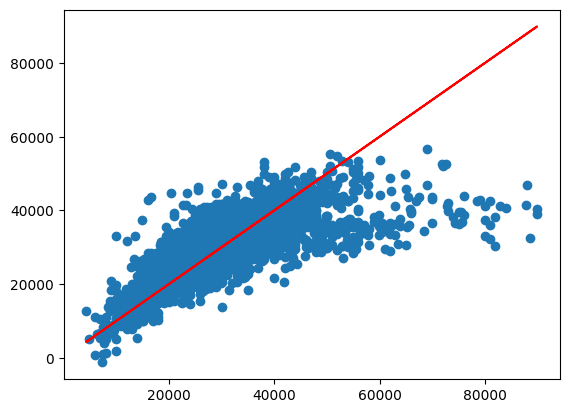

In [517]:
#plotting actual values vs predicted values

plt.scatter(y_test,lr_predictions)

#perfect prediction

plt.plot(y_test,y_test,'r')

###  Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [518]:
#Variance

metrics.explained_variance_score(y_test,lr_predictions)

0.47198151102727104

In [519]:
print('MAE:', metrics.mean_absolute_error(y_test, lr_predictions))
print('MSE:', metrics.mean_squared_error(y_test, lr_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lr_predictions)))

MAE: 6160.031092515207
MSE: 76297123.0023174
RMSE: 8734.822436793858


In [520]:
df['price'].mean()

30620.10696883853

nce our mean absoulute error is **6092 it means we are off by about **20%** from the mean. 

### II. ANN Model

In [521]:
loss = pd.DataFrame(model.history.history)

<AxesSubplot: >

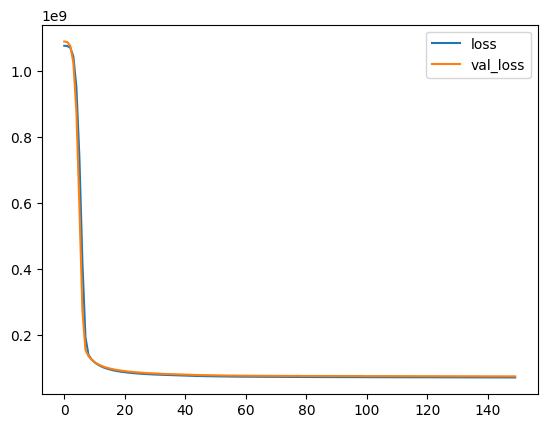

In [522]:
loss.plot()

In [523]:
ann_predictions = model.predict(X_test)

83/83 [==============================] - 0s 1ms/step


In [524]:
print('MAE:', metrics.mean_absolute_error(y_test, ann_predictions))
print('MSE:', metrics.mean_squared_error(y_test, ann_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ann_predictions)))

MAE: 6025.666273134352
MSE: 73097515.2193658
RMSE: 8549.708487391006


In [525]:
df['price'].mean()

30620.10696883853

Since our mean absoulute error is **5802**, it means we are off by about **19%** from the mean. 

ANN model is better than Linear regression model since it has a lower error from the mean

In [526]:
#Variance

metrics.explained_variance_score(y_test,ann_predictions)

0.49428567029693127

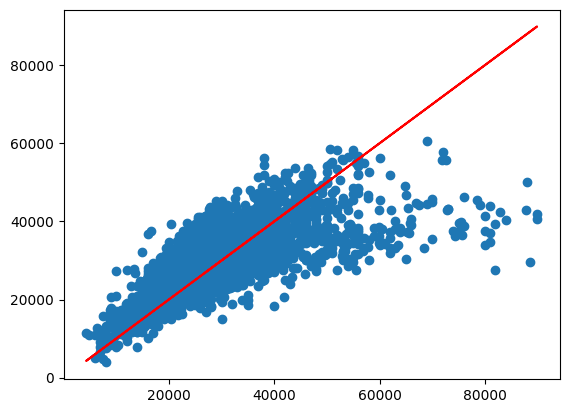

In [527]:
# Our predictions
plt.scatter(y_test,ann_predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

## 8.Deploying

In [528]:
# saving Linear regression model

filename = 'finalized_model.sav'
pickle.dump(lm,open(filename,'wb'))

In [529]:
# saving ANN model 

model.save("model",save_format='h5')

In [530]:
# loading model
saved_model = load_model("model")

In [534]:
sample = df.sample()
sample

,brand,model,mileage,year,fuel_type,ownerCount,accidentCount,transmission,state,body_style,engine,drive_train,price
6380,21,96,25645,2018,3,2.0,0,0,0,8,49,0,24998


In [531]:
# trans.inverse_transform(sample)
sample = sample.drop(['brand','model','price'],axis=1)
trans.transform(sample.values)

array([[ 0.2186849 , -1.49642038, -5.14770119,  1.03283847, -0.36649525,
         0.        , -0.93891563, -3.00324638,  2.63068725,  0.68287424]])

In [532]:
result = saved_model.predict(sample)

1/1 [==============================] - 0s 76ms/step


In [360]:
# # Our predictions
# plt.scatter(y_test,result)

# # Perfect predictions
# plt.plot(y_test,y_test,'r')

In [551]:
result

array([[2034824.8]], dtype=float32)

In [555]:
result[0][0]

2034824.8